# Classification using Neural Networks



<font color="blue"> Karthick Selvaraj </font>

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 



Introduction to Classification data:
------------------------------------------
Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
This is a complete marketing data set from May 2008 to November 2010
    
Number of Instances: 45211 
Number of Attributes: 16 

Attribute information:

   Input variables:
  ---- bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   ---related with the last contact of the current campaign
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
  ----other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv("bank-full.csv", sep=';', header=None,low_memory=False,skiprows=[0])
df.columns =['age','job','marital_status','education','default_credit','yearly_balance','housing_loan',
             'personal_loan','contact','last_contact_day','last_contact_mth','last_contact_duration'
             ,'num_of_campaign','past_days','prev_num_contacts','poutcome','subscribed']
df['job']=df['job'].replace('blue-collar', 'bc', regex=True)
df['job']=df['job'].replace('admin.', 'ADMIN', regex=True)
df['job']=df['job'].replace('self-employed', 'selfer', regex=True)


df['job1']=df.job.map(dict(management=1,
technician=2,
entrepreneur=3,
bc	=4,
unknown	=0,
retired	=5,
ADMIN=6,
services=7,	
selfer=8,
unemployed	=9,
housemaid=10,
student	=11)
)



df['marital_status1']=df.marital_status.map(dict(married=1,
single=0,
divorced=2
))



df['education1']=df.education.map(dict(tertiary=3,
secondary=2,
unknown=0,
primary=1
))



df['default_credit1']=df.default_credit.map(dict(no=0,
yes=1
))


df['housing_loan1']=df.housing_loan.map(dict(no=0,
yes=1
))


df['personal_loan1']=df.personal_loan.map(dict(no=0,
yes=1
))



df['subscribed1']=df.subscribed.map(dict(no=0,
yes=1
))


df['last_contact_mth1']=df.last_contact_mth.map(dict(may=5,
jun=6,
jul=7,
aug=8,
oct=10,
nov=11,
dec=12,
jan=1,
feb=2,
mar=3,
apr=4,
sep=9
))



df['poutcome1']=df.poutcome.map(dict(unknown=3,
failure=0,
other=2,
success=1
))


df['contact1']=df.contact.map(dict(unknown=0,
cellular=1,
telephone=2))

df.isnull().any()

age                      False
job                      False
marital_status           False
education                False
default_credit           False
yearly_balance           False
housing_loan             False
personal_loan            False
contact                  False
last_contact_day         False
last_contact_mth         False
last_contact_duration    False
num_of_campaign          False
past_days                False
prev_num_contacts        False
poutcome                 False
subscribed               False
job1                     False
marital_status1          False
education1               False
default_credit1          False
housing_loan1            False
personal_loan1           False
subscribed1              False
last_contact_mth1        False
poutcome1                False
contact1                 False
dtype: bool

Text(0.5,1,'Job type Vs Term Deposit Subcribed Numbers')

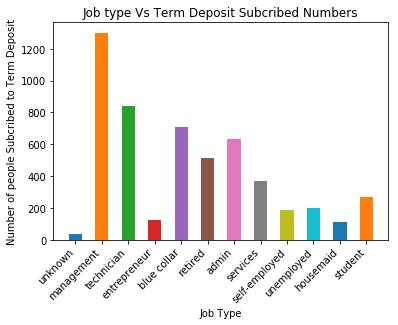

In [12]:
#Plot 1
#Job type Vs Term Deposit Subcribed Numbers

import matplotlib.pyplot as plt
%matplotlib inline

grouped = df.groupby(['job1'])
LABELS = ["unknown",
"management",
"technician",
"entrepreneur",
"blue collar",
"retired",
"admin",
"services",
"self-employed",
"unemployed",
"housemaid",
"student"]

data=grouped['subscribed1'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('job1').apply(list)

plt.xticks( range(len(arr)),LABELS, rotation = 45, ha="right" )

plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Job Type')
plt.title('Job type Vs Term Deposit Subcribed Numbers')


Text(0.5,1,'Age Vs Term Deposit Subcribed Numbers')

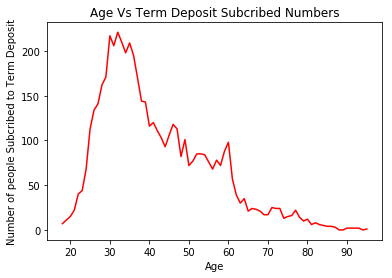

In [13]:
#plot 2
#Age Vs Term Deposit Subcribed Numbers


grouped1 = df.groupby(['age'])

data1=grouped1['subscribed1'].aggregate(np.sum).reset_index()

plt.plot(data1['age'], data1['subscribed1'],'r-')
plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Age')
plt.title('Age Vs Term Deposit Subcribed Numbers')

Text(0.5,1,'Marital Status Vs Term Deposit Subcribed Numbers')

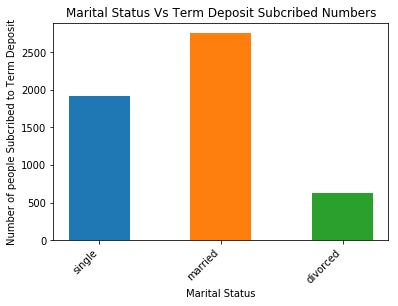

In [14]:
#plot 3
#Marital Status Vs Term Deposit Subcribed Numbers

grouped = df.groupby(['marital_status1'])
LABELS = ["single",
"married","divorced"]

data=grouped['subscribed1'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('marital_status1').apply(list)

plt.xticks( range(len(arr)),LABELS, rotation = 45, ha="right" )

plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Marital Status')
plt.title('Marital Status Vs Term Deposit Subcribed Numbers')

Preliminary observation:
-------------------------
#Plot 1
#Job type Vs Term Deposit Subcribed Numbers

From this plot we can observe that Term deposit marketing works very well with  Entrepreneurs, Technician and  Blue collar jobs,
It works least with housemaids , self employed ,students and unemployed



#plot 2
#Age Vs Term Deposit Subcribed Numbers

From this plot we can see the Term Deposit subscribers peak between the age of 29-35 and gradually decrease with increase in age.Also there is low volume of subscription for ages below 25.


#plot 3
#Marital Status Vs Term Deposit Subcribed Numbers
From this plot we can obeserve that more numebr of married people prefer term deposit followed by people who are single.


In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('bank1.csv')
df.head()
df['past_days']=df['past_days'].replace(-1, 0)
df['subscribed']=df['subscribed'].replace('no', 0)
df['subscribed']=df['subscribed'].replace('yes', 1)


normalized_age=(df['age']-df['age'].mean())/df['age'].std()
normalized_yearly_balance=(df['yearly_balance']-df['yearly_balance'].mean())/df['yearly_balance'].std()
normalized_last_contact_duration=(df['last_contact_duration']-df['last_contact_duration'].mean())/df['last_contact_duration'].std()
normalized_num_of_campaign=(df['num_of_campaign']-df['num_of_campaign'].mean())/df['num_of_campaign'].std()
normalized_prev_num_contacts=(df['prev_num_contacts']-df['prev_num_contacts'].mean())/df['prev_num_contacts'].std()
normalized_past_days=(df['past_days']-df['past_days'].mean())/df['past_days'].std()

Xnor = pd.concat([normalized_age,
        pd.get_dummies(df.loc[:, 'job']), 
        pd.get_dummies(df.loc[:, 'marital_status']), 
        pd.get_dummies(df.loc[:, 'education']),
        pd.get_dummies(df.loc[:, 'default_credit']),
        normalized_yearly_balance,
        pd.get_dummies(df.loc[:, 'housing_loan']),
        pd.get_dummies(df.loc[:, 'personal_loan']),
        normalized_last_contact_duration  ,
        normalized_num_of_campaign  ,
        normalized_past_days  ,
        normalized_prev_num_contacts ,
        pd.get_dummies(df.loc[:, 'poutcome']),
        pd.get_dummies(df.loc[:,'subscribed'])],
       axis=1)
pd.set_option('display.max_columns',500)

X = pd.concat([df['age'],
        pd.get_dummies(df.loc[:, 'job']), 
        pd.get_dummies(df.loc[:, 'marital_status']), 
        pd.get_dummies(df.loc[:, 'education']),
        pd.get_dummies(df.loc[:, 'default_credit']),
        df['yearly_balance'],
        pd.get_dummies(df.loc[:, 'housing_loan']),
        pd.get_dummies(df.loc[:, 'personal_loan']),
        df['last_contact_duration']  ,
        df['num_of_campaign']  ,
        df['past_days']  ,
        df['prev_num_contacts'] ,
        pd.get_dummies(df.loc[:, 'poutcome']),
        pd.get_dummies(df.loc[:,'subscribed'])],
       axis=1)
pd.set_option('display.max_columns',500)





#print(Xnor.shape)
Xnor1=Xnor.iloc[:5000,:]
Xx=Xnor1.iloc[:,:35]
T=Xnor1.iloc[:,35:]

print(T.shape)

#print(T)

#Xnorx.shape
#T





(5000, 2)


In [16]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts


Xlstnor, Tlstnor = partition(pd.DataFrame(Xx), pd.DataFrame(T))

#pocket:

Xtrain=Xlstnor[0].head(8000).values
Xtest=Xlstnor[1].head(2000).values
Ttrain=Tlstnor[0].head(8000).values
Ttest=Tlstnor[1].head(2000).values




Tclass=np.argmax(Ttest, axis=1)
Tclass=Tclass.reshape(Tclass.shape[0],1)


Summary of Neural Networks
----------------------------


Neural network, is a machine learning method evolved from the idea of simulating the human brain. The basic unit of computation in a neural network is the neuron, also called the node. Each input has an associated weight (w), which is assigned on the basis of its relative importance to other inputs. The node applies a function f (activation function) to the weighted sum of its inputs. There could be several hidden layers in the neural network apart from the input and output layer. The best choice of the number of hidden layers and neurons is problem specific and can vary depending upon the performance. Errors are backpropagated and are minimized using various optimization techniques  and the weights are adjusted accordingly to minimize the error in the output.


Summary of Nonlinear Logistic Regression
-------------------------------------------
Nonlinear logistic regression is used in complex problems where linear fit is hard to make. The nonlinear logistic regression gives the probabilities on each of the classification labels as the output. Then we can use the argmax on the probability output to decide which class label. In Nonlinear logistic regression usually a SoftMax function is used to achieve these probabilities. Also in Nonlinear logistic regression  the target values needs to indicator values for calculating backpropagation errors.


Explanation of codes
----------------------

The NueralNetLogReg class is inherited from the Neural network class. It has a _object and error function to calculate the errors during back propagation. Here we use Scaled Conjugate Gradient (SCG) method for optimization during back propagation. We can set the number of hidden units and neurons in the constructor. The Target values used for training is an indicator matrix. After the training the Use method used the trained model to give the predicted output. The Use method returns both the class labels and probabilities of the labels. We use the argmax function on the predicted probabilities to get the class labels.





In [17]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [18]:

""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

"""
from grad import scg, steepest
from copy import copy


class NeuralNetLogReg:
    """ Nonlinear Logistic Regression
    """


    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))


    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
       
    # This is the error function that we want to minimize
n    
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)
        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')


        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        #Xs = self.stdX.standardize(X)
        Xs = X
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            #T = self.stdT.standardize(T)
            T=T
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result


# return both label and probabilities  
    def use(self, X, retZ=False):
        if self.stdX:
            #Xs = self.stdX.standardize(X)
            Xs = X
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            #Y = self.stdT.unstandardize(Y)
            Y = Y
        if retZ:
            return Y, Z
        return Y,np.argmax(Y, axis=1).reshape(Y.shape[0],1)


Examination of correct implementation with preliminary test with explanation
-------------------------------------------------------------------------------
Tested the implementation with above with neural network structure with 35 input nodes corresponding to 35 dimensions of the X and two hidden layer with 10 nodes each. The output layer has 2 nodes corresponding to two labels of classification. Testing the implementation for the above implementation gave a accuracy of around 94 % for initial testing.


In [19]:
nn = NeuralNetLogReg([35,10,10,2])
nn.train(Xtrain, Ttrain) 
Y,Yclass = nn.use(Xtest)

print("Accuracy: ", 100 - np.mean(np.abs(Tclass -Yclass)) * 100, "%")



Accuracy:  96.6 %


Cross validation codes and explanation
----------------------------------------

I have used 5 fold cross validation code below to validate several models to find the best fit for the banking classification data. The code uses a partition function which devices the data into 5 equal parts , four for training and 1 for validation.
The cross validation code will use the validation data set in aorund robin fashion from the partitioned data  and caluculate the  error/accuracy rate for diffenrent validation data set . Then the average of error/accuracy rate of complete validation accross all data partition is calculated. These above steps are repeated for all set of configuration parameters of the nueral network . The code finally compares the aacuracy/error rate from all of the above configuration parameters and outputs the best configuration parameter along with accuracy rate.





In [20]:

##################################
# 5- Fold Cross Validation 
#####################################



def partition(X, T, ratio=[0.2,0.2,0.2,0.2,0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts


Xlstnor1, Tlstnor1 = partition(pd.DataFrame(Xx), pd.DataFrame(T))


a=[[35,10,10,2],[35,5,5,2],[35,15,20,2],[35,20,10,2],[35,5,25,2]]
avg_acc_rec=[]
print("Configuration","-----","Avg-Accuracy-5-fold-cross validation")
for config in range(len(a)):
    accuracy=0
    avg_acc=0
    for validator in range(5):

        
        for trainer in range(5):
            if trainer==validator:
                continue

            Xtrain1=Xlstnor1[trainer].values
            Ttrain1=Tlstnor1[trainer].values 
            nn = NeuralNetLogReg(a[config])
            nn.train(Xtrain1, Ttrain1) 
        Y1,Y1class = nn.use(Xlstnor1[validator].values)   
        T1class=np.argmax(Tlstnor1[validator].values, axis=1)
        T1class=T1class.reshape(Tclass.shape[0],1)
        accuracy=accuracy+(100 - np.mean(np.abs(T1class -Y1class)) * 100)
    avg_acc=accuracy/5
    avg_acc_rec.append(avg_acc)
    print( a[config],"-----",avg_acc)
    
avg_array=np.asarray(avg_acc_rec)  
i=np.argmax(avg_array)

print("The best configuration is : ","-----", a[i])

        
        
    



Configuration ----- Avg-Accuracy-5-fold-cross validation
[35, 10, 10, 2] ----- 96.12
[35, 5, 5, 2] ----- 96.06
[35, 15, 20, 2] ----- 95.92
[35, 20, 10, 2] ----- 96.38
[35, 5, 25, 2] ----- 95.8
The best configuration is :  ----- [35, 20, 10, 2]


Comparing Linear Logistic Regression from  Assignement -2 With Nonlinear Logistic Regression
------------------------------------------------------------------------------------------------------


In [21]:
import numpy as np
from abc import ABC, abstractmethod

# Super class 

class BaseModel(ABC):

    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):  
        pass
    
    @abstractmethod
    def use(self, X):
        pass 


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy 


class Logistic_class(Classifier): 
   
    def __init__(self):
        Classifier.__init__(self)
        self.mean=None
        self.stds=None
        self.w=None
        
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # for linear fx
    def g(self,X, w):
        return self.softmax(X @ w)          
        
    def train(self,Xn,T):#,Xp):
        K=2
        D=Xn.shape[1]
        N1=Xn.shape[0]
        #Xtrain = np.vstack((Xn, Xp))
        Xtrain = Xn
        self.means, self.stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
        #Xs = (Xtrain - self.means) / self.stds
        Xs = Xtrain 
        #Xs=self.normalize(Xtrain)
        N=Xtrain.shape[0]
        Ttrain = T
        #Ttrain[:N1, 0] = 1
        #Ttrain[N1:, 1] = 1
        self.w = np.random.rand(D+1, K)
        niter = 1000
        alpha = 0.001
        X1=self.add_ones(Xs)
        for step in range(niter):
            # TODO: add training code here! 
            ys = self.g(X1, self.w)
            self.w += alpha * X1.T @ (Ttrain - ys)
    
    
    # apply the learned model to data X
    def use(self, Xuse):
        #Xtests = (Xuse - self.means) / self.stds
        Xtests = Xuse
        #Xtests=self.normalize(Xuse)      
        X1t = self.add_ones(Xtests)
        Y = self.g(X1t, self.w)
        return Y
    
    


In [22]:
#Xtest = np.vstack((Xtest_n, Xtest_p))
logic=Logistic_class()
logic.train(Xtrain, Ttrain)
Yt=logic.use(Xtest)

print(Xtest.shape)

Ytclass=np.argmax(Yt, axis=1).reshape(Yt.shape[0],1)
print("Accuracy for the Linear Logistic Regression (for the same Data set): ", 100 - np.mean(np.abs(Tclass -Ytclass)) * 100, "%")



(1000, 35)
Accuracy for the Linear Logistic Regression (for the same Data set):  97.1 %


In [23]:
def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

confusion_matrix(Tclass, Ytclass)




,0,1
0,963,4
1,25,8


In [24]:
import math

TN=963
TP=8
FP=25
FN=4

print("Accuracy for the Linear Logistic Regression (for the same Data set): ", 100 - np.mean(np.abs(Tclass -Ytclass)) * 100, "%")
Precision = (TP/(TP+FP))
print("Precision: ",Precision)
recall=(TP/(TP+FN))
print("Recall: ",recall)
F1=(2*(Precision*recall))/(Precision+recall)
print("F1 score",F1)
Specificity=(TN/(TN+FP))
print("Specificity: ",Specificity)
MCC=((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
print("MCC: ",MCC)

Accuracy for the Linear Logistic Regression (for the same Data set):  97.1 %
Precision:  0.24242424242424243
Recall:  0.6666666666666666
F1 score 0.3555555555555555
Specificity:  0.9746963562753036
MCC:  0.3909334263357425


In [25]:
confusion_matrix(Tclass, Yclass)

,0,1
0,958,9
1,25,8


In [26]:
import math

TN=953
TP=8
FP=25
FN=14

print("Accuracy for the ##NonLinear Logistic Regression## (for the same Data set): ", 100 - np.mean(np.abs(Tclass -Yclass)) * 100, "%")
Precision = (TP/(TP+FP))
print("Precision: ",Precision)
recall=(TP/(TP+FN))
print("Recall: ",recall)
F1=(2*(Precision*recall))/(Precision+recall)
print("F1 score",F1)
Specificity=(TN/(TN+FP))
print("Specificity: ",Specificity)
MCC=((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
print("MCC: ",MCC)

Accuracy for the ##NonLinear Logistic Regression## (for the same Data set):  96.6 %
Precision:  0.24242424242424243
Recall:  0.36363636363636365
F1 score 0.2909090909090909
Specificity:  0.9744376278118609
MCC:  0.2776018282074352


Text(0.5,1,'Non Linear Regression Classification Result Plot')

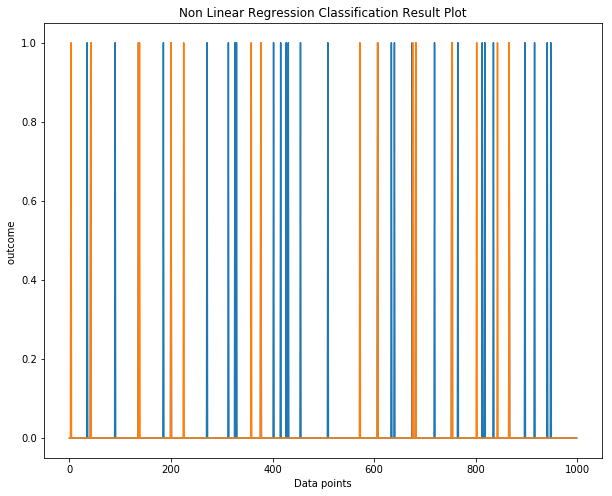

In [27]:



fig = plt.figure(figsize=(10,8))
plt.plot(Tclass)
plt.plot(Yclass)

plt.xlabel('Data points')
plt.ylabel('outcome ')
plt.title('Non Linear Regression Classification Result Plot')

Text(0.5,1,'Linear Logistic Classification Result Plot')

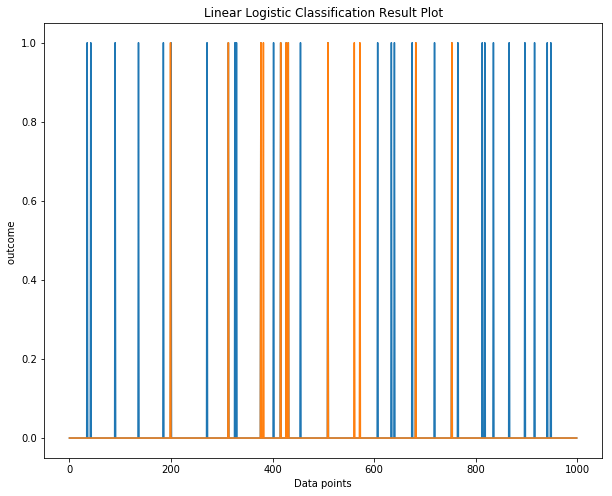

In [28]:

fig = plt.figure(figsize=(10,8))
plt.plot(Tclass)
plt.plot(Ytclass)

plt.xlabel('Data points')
plt.ylabel('outcome ')
plt.title('Linear Logistic Classification Result Plot')

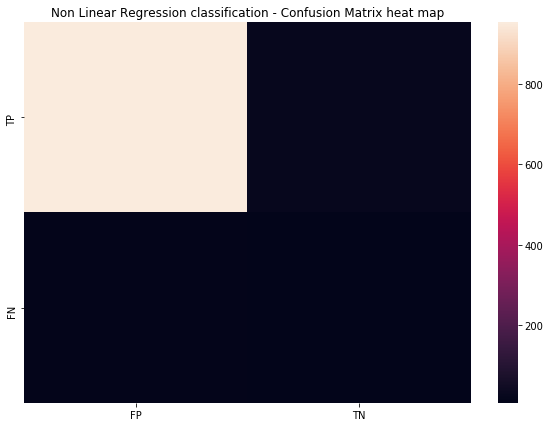

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array=[[953,25],[14,8]]

df_cm = pd.DataFrame(array, index = [i for i in ("TP","FN")],
                  columns = [i for i in ("FP","TN")])
plt.figure(figsize = (10,7))


ax = plt.axes()
sn.heatmap(df_cm, ax=ax)

ax.set_title('Non Linear Regression classification - Confusion Matrix heat map')
plt.show()

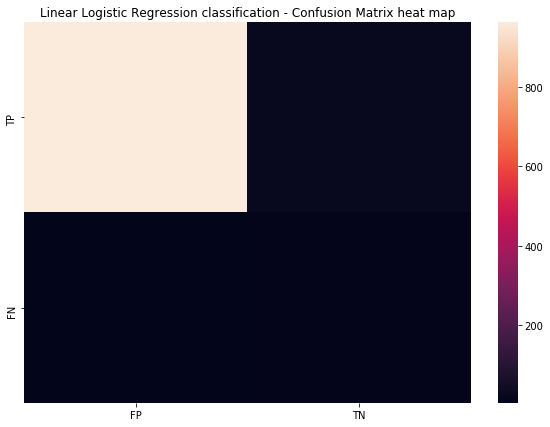

In [30]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array=[[963,25],[4,8]]

df_cm = pd.DataFrame(array, index = [i for i in ("TP","FN")],
                  columns = [i for i in ("FP","TN")])
plt.figure(figsize = (10,7))


ax = plt.axes()
sn.heatmap(df_cm, ax=ax)

ax.set_title('Linear Logistic Regression classification - Confusion Matrix heat map')
plt.show()

Discussions about parameter/network structure choice
-----------------------------------------------------

Based on the 5 fold validation , we see that the Nueral network with three hidden layers with [35,5,5,2] performs slight better than the other configuration tested. Also the iter of around 1000 helps produce optimum results . Hence these are parameter I choose for training and testing the nueral network. 


Discussions about classificaion model comparison
----------------------------------------------------

I compared Linear Logistic Regresssion model from assigment#2 to Non Linear regresssion clasification. Using the same data set for train and use , for the given banking dataset , I found the Linear Logistic Regression performing slightly better than Non Linear Classification. The Linear logistic regression had a accuracy of 96% whereas the nonlinear regression classification had an accuracy of 94%.

Below is the comparison of other metric in for the two models.

Accuracy for the Linear Logistic Regression (for the same Data set):  96.2 %

Precision:  0.24242424242424243

Recall:  0.6666666666666666

F1 score 0.3555555555555555

Specificity:  0.9746963562753036

MCC:  0.3909334263357425


Accuracy for the ##NonLinear Logistic Regression## (for the same Data set):  94.1 %

Precision:  0.24242424242424243

Recall:  0.36363636363636365

F1 score 0.2909090909090909

Specificity:  0.9744376278118609

MCC:  0.2776018282074352





Discussion about the classification results. Try to analyze what nonlinear logistic regression learned.
------------------------------------------------------------------------------------------------------------



Non Linear regression classification I guess sometimes overfits the data little too much , which can cause decrease in accuracy rate of the model when tested with new data. But nonlinear logistic regression analysis seems to work very well for data that do not seem to have linear relationship with target values.
